## Алгебра матриц. Системы линейных уравнений


### Матрицы

Матрицы в библиотеке numpy

In [1]:
import numpy as np

In [2]:
def Minor_elem(A,i, j):
    ''' Вычисляет минор элемента a_ij '''
    m,n = A.shape
    if m != n:
        raise ValueError('Матрица должна быть квадратной')
    if (0 < i <= n) & (0 < j <= n):
        A.row_del(i-1) # нумерация элементов массива с 0
        A.col_del(j-1)
    else:
        raise ValueError('индекс элемента больше размера матрицы')
    return(det(А))

In [3]:
def Algebr_compl(A,i,j):
    m = Minor_elem(A,i,j)
    return (-l)**(i+j)*m

In [4]:
def Algebr_compl(A,i,j):
    m = Minor_elem(A,i,j)
    return (-1)**(i+j)*m

In [5]:
def Minor_Matrix(A,Row,Col):
    n = len(Row)
    m = len(Col)
    if n != m:
        raise ValueError('The quantities of the given \
        rows and columns must be equal')
    if (n < 1) or (n > A.shape[0]):
        raise ValueError('Invalid number of minor rows')
    M_Row = A.row(Row[0]-1)
    for i in range(1,n):
        M_Row = M_Row.row_insert(i,A.row(Row[i]-1))
    M_Col = M_Row.col(Col[0]-1)
    for j in range(1,m):
        M_Col = M_Col.col_insert(j,M_Row.col(Col[j]-1))
    return det(M_Col)


In [6]:
def silvestr(A):

    m,n = A.shape
    if m!=n:
        raise ValueError('Матрица должна быть квадратной')
    Ml = А[0,0]
    if Ml == 0:
        return('Не является знакоопределенной')
    elif Ml > 0: # проверка на положительную определенность
        for k in range(2,n+1):
            Mk = det(A[0:k,0:k])
            if Mk <=0:
                return('Не является знакоопределенной')
        return('Положительно определена')
    else: # проверка на отрицательную определенность
        for k in range(2,n+1):
            Mk = det(А[0:k,0:k])
            if Mk == 0:
                return('Не является знакоопределенной')
            else:
                s1 = Ml/abs(Ml)
                s2 = Mk/abs(Mk)
                if s1*s2 > 0:
                    return('He является знакоопределенной')
            Ml = Mk
        return('Отрицательно определена')

Создание матрицы.

In [7]:
A = np.array([[-7,4,0],
             [0,-1,0],
             [-1,5,7]])
A

array([[-7,  4,  0],
       [ 0, -1,  0],
       [-1,  5,  7]])

In [8]:
'''Единичная матрица третьего порядка'''
E = np.eye(3)
E

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [9]:
''' Матрица-строка '''
А = np.array([1,2,3])
А

array([1, 2, 3])

Элементы матрицы

In [10]:
А = np.array([[-7,4,0],
[0,-1,0],
[-1,5,7]])
''' Элемент а12 (нумерация с 0) '''
А[0,1]

4

In [11]:
''' Первая строка '''
А[0]


array([-7,  4,  0])

In [12]:
''' Столбцы, начиная со второго
и заканчивая третьим '''
А[:,1:3]

array([[ 4,  0],
       [-1,  0],
       [ 5,  7]])

Сложение, вычитание, умножение на число.

In [13]:
А = np.array([[1,2,3],
              [4,5,6] ,
              [7,8,9] ])
Е = np.eye(3)
А-Е

array([[0., 2., 3.],
       [4., 4., 6.],
       [7., 8., 8.]])

In [14]:
3*А


array([[ 3,  6,  9],
       [12, 15, 18],
       [21, 24, 27]])

Поэлементное умножение - операция *

In [15]:
А = np.array([[1,2,3],
              [4,5,6] ]),
В = np.array([[0,0,0],
              [2,2,2]])
А * В

array([[[ 0,  0,  0],
        [ 8, 10, 12]]])

Транспонирование - метод .Т

Пример 1

In [16]:
B = np.array([[1,0],
              [0,-2],
              [1,1] ])
В1 = B.T
В1

array([[ 1,  0,  1],
       [ 0, -2,  1]])

Пример 2.

In [17]:
А = np.array([[-7,4,0],
              [0,-1,0],
              [-1,5,7]])
В = np.array([[1,0],
              [0,-2],
              [1,1] ])
F = А@В
F


array([[-7, -8],
       [ 0,  2],
       [ 6, -3]])

### Определитель матрицы

Пример 3.

In [18]:
A = np.array([[7,-3],
              [1,1]])
detA = np.linalg.det(A)
detA

9.999999999999998

Пример 4.

In [19]:
A = np.array([[7,-3],
              [1,1] ])
A1 = np.linalg.inv(A)
A1

array([[ 0.1,  0.3],
       [-0.1,  0.7]])

### Матрицы в библиотеке sympy

In [20]:
''' Подключение функций библиотеки '''
from sympy import *

Создание матрицы


In [21]:
а = Matrix([[1,2,3], [0,-1, 1]])
а


Matrix([
[1,  2, 3],
[0, -1, 1]])

Может содержать символы - переменные:

In [22]:
x,y,z = symbols('x у z')
v = Matrix([[1,x],[y,z]])
v


Matrix([
[1, x],
[у, z]])

In [23]:
''' Создание единичной матрицы '''
eye(3)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [24]:
''' Создание нулевой матрицы '''
zeros(2,3)

Matrix([
[0, 0, 0],
[0, 0, 0]])

In [25]:
'''Создание матрицы, все элементы которой равны 1'''
ones(3,2)

Matrix([
[1, 1],
[1, 1],
[1, 1]])

In [26]:
''' Создание диагональной матрицы '''
diag(1,5,-2)

Matrix([
[1, 0,  0],
[0, 5,  0],
[0, 0, -2]])

In [27]:
''' Элементами диагонали могут быть матрицы '''
diag(-1, ones(2, 2), Matrix([5, 7, 5]))

Matrix([
[-1, 0, 0, 0],
[ 0, 1, 1, 0],
[ 0, 1, 1, 0],
[ 0, 0, 0, 5],
[ 0, 0, 0, 7],
[ 0, 0, 0, 5]])

In [28]:
''' Матрица 1x3 (вектор-строка) '''
А = Matrix([[1,2,3]])
А

Matrix([[1, 2, 3]])

In [29]:
''' Матрица 3x1 (вектор-столбец)'''
А = Matrix([[1], [2],[3]])
А

Matrix([
[1],
[2],
[3]])

In [30]:
''' Отличие от правила в модуле numpy:
одна пара квадратных скобок приводит к созданию вектор-столбца '''
А = Matrix([1,2,3])
А


Matrix([
[1],
[2],
[3]])

Пример 5. Матрица размера 2 X 3 (2 строки, 3 столбца):

In [31]:
A = Matrix([[1,2,3], [0,-1, 1]])
A.shape

(2, 3)

Пример 6. Матрица третьего порядка

In [32]:
all, а12, а13, а21, а22, а23, а31, а32, аЗЗ = \
symbols('a11 а12 а13 а21 a22 a23 а31 a32 а33')
А = Matrix([[all, а12, а13],
            [а21, а22, а23],
            [а31, а32, аЗЗ]])
А


Matrix([
[a11, а12, а13],
[а21, a22, a23],
[а31, a32, а33]])

In [33]:
''' Элемент в третьей строке, в первом столбце (нумерация с 0'''
А[2,0]

а31

In [34]:
''' Второй столбец '''
А[:, 1:2]


Matrix([
[а12],
[a22],
[a32]])

Методы получения строки и столбца - ,row(), .col()

In [35]:
А = Matrix([[1,2,3],
[4,5,6] ,
[7,8,9] ])
''' Первая строка '''
A.row(0)

Matrix([[1, 2, 3]])

In [36]:
''' Второй столбец '''
А.col(1)


Matrix([
[2],
[5],
[8]])

Пример 7

In [37]:
A = Matrix([[1,2,3],
            [4,5,6] ,
            [7,8,9] ])
A

Matrix([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])

In [38]:
A.row_del(0)
A

Matrix([
[4, 5, 6],
[7, 8, 9]])

In [39]:
A.col_del(1)
A

Matrix([
[4, 6],
[7, 9]])

Пример 8.

In [40]:
B = Matrix([[1,2,3],
            [7,8,9] ])
A = B.row_insert(1, Matrix([[4,5,6]]))
A

Matrix([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])

In [41]:
''' Матрица В не изменилась '''
B

Matrix([
[1, 2, 3],
[7, 8, 9]])

In [42]:
D = B.col_insert(3,Matrix([4,10]))
D

Matrix([
[1, 2, 3,  4],
[7, 8, 9, 10]])

Пример 9.

In [43]:
V = Matrix([[1,x],[y,z]])
V*V


Matrix([
[x*у + 1,    x*z + x],
[z*у + у, x*у + z**2]])

Пример 10.


In [44]:
a11, а12, а21, а22, а31, а32, b11, b12, b21, b22 = \
symbols('a11 a12 a21 a22 a31 a32 b11 b12 b21 b22')
А = Matrix([[a11, а12], [а21, а22], [а31, а32]])
В = Matrix([[b11, b12], [b21, b22]])
А*В


Matrix([
[a11*b11 + a12*b21, a11*b12 + a12*b22],
[a21*b11 + a22*b21, a21*b12 + a22*b22],
[a31*b11 + a32*b21, a31*b12 + a32*b22]])

Пример 11.

In [45]:
B = Matrix( [ [b11, b12], [b21, b22]])
B

Matrix([
[b11, b12],
[b21, b22]])

In [46]:
B.T

Matrix([
[b11, b21],
[b12, b22]])

Пример 12.

In [47]:
D = Matrix([[0,1], [1,0]])
det(D)

-1

Пример 13.

In [48]:
x11, x12, x21, х22 = symbols('xll x12 х21 х22')
X = Matrix([[x11, x12], [x21, х22]])
det(X)

-x12*х21 + xll*х22

In [49]:
y11, y12, y13, y21, y22, y23, y31, y32, yЗЗ = \
symbols('y11 y12 y13 y21 y22 y23 y31 y32 y33')
Y = Matrix([[y11, y12, y13], [y21, y22, y23], [y31, y32, yЗЗ]])
det(Y)

y11*y22*y33 - y11*y23*y32 - y12*y21*y33 + y12*y23*y31 + y13*y21*y32 - y13*y22*y31

Пример 14.


In [50]:
A = Matrix( [[ 2,-3,-8],
             [-2,-1, 2],
             [ 1, 0,-3]] )
A.inv()

Matrix([
[3/10, -9/10, -7/5],
[-2/5,   1/5,  6/5],
[1/10, -3/10, -4/5]])

In [51]:
x11, x12, x21, x22 = symbols('x11 x12 x21 x22')
X = Matrix([[x11, x12], [x21, x22]])
X.inv()

Matrix([
[ x22/(x11*x22 - x12*x21), -x12/(x11*x22 - x12*x21)],
[-x21/(x11*x22 - x12*x21),  x11/(x11*x22 - x12*x21)]])

In [52]:
А = Matrix( [[ 2,-3,-8],
             [-2,-1, 2],
             [ 1, 0,-3]] )
А**-1

Matrix([
[3/10, -9/10, -7/5],
[-2/5,   1/5,  6/5],
[1/10, -3/10, -4/5]])

Пример 15.

In [53]:
A = Matrix([[2,4,5,6,0,4],
            [8,-2,0,2,4,-2],
            [6,-6,-5,-4,4,-6],
            [-4,0,2,-2,2,0],
            [-2,-4,-5,-6,0,-4],
            [0,1,0,1,0,1]])
A.rank()

4

Пример 16.

In [54]:
a = Matrix([[1,3,4,5,0],
            [4,-1,0,1,2],
            [3,2,5,5,3],
            [-2,0,1,-1,1],
            [4,6,7,11,-1]])
a.rank()

3

Пример 17.

In [55]:
A = Matrix([[1,3,4],
            [4,-1,0],
            [3,2,5],
            [-2,0,11],
            [4,6,7]])
A

Matrix([
[ 1,  3,  4],
[ 4, -1,  0],
[ 3,  2,  5],
[-2,  0, 11],
[ 4,  6,  7]])

In [56]:
A.T.columnspace()

[Matrix([
 [1],
 [3],
 [4]]),
 Matrix([
 [ 4],
 [-1],
 [ 0]]),
 Matrix([
 [3],
 [2],
 [5]])]

In [57]:
A.T.rref()[1]

(0, 1, 2)

Пример 18. 

In [58]:
A = Matrix([[1,0,-3,9],
[2,-7,11,5],
[-9,4,25,84],
[3,12,-5,58]])
''' Матрица после удаления 3-й строки и 2-го столбца'''
M = Matrix([[1,-3,9], [2,11,5], [3,-5,58]])
''' Определитель '''
det(M)


579

Пример 19.

In [59]:
А = Matrix([[1,0,-3,9],
            [2,-7,11,5],
            [-9,4,25,84],
            [3,12,-5,58]])
Algebr_compl(А, 3,2)

-579

Пример 20.

In [60]:
A = Matrix([[1,0,-3,9],
            [2,-7,11,5],
            [-9,4,25,84],
            [3,12,-5,58]])
Row = [1,3]
Col = [3,4]
Minor_Matrix(A,Row,Col)

-477

Пример 21. 

In [61]:
A = Matrix([[1,3,2,4,5],
[0,0,-1,2,7],
[3,9,6,12,15],
[5,15,9,26,22],
[1,3,1,10,2]])
A

Matrix([
[1,  3,  2,  4,  5],
[0,  0, -1,  2,  7],
[3,  9,  6, 12, 15],
[5, 15,  9, 26, 22],
[1,  3,  1, 10,  2]])

In [62]:
A.rank()

3

### Системы линейных уравнений


Пример 22.

In [63]:
A = np.array([[3, 2, 0],
[1, -1, 0],
[0, 5, 1]])
b = np.array([2, 4, -1])
u = np.linalg.solve(A,b)
u

array([ 2., -2.,  9.])

In [64]:
np.dot(A, u) == b

array([ True,  True,  True])

Пример 23.

In [65]:
A = Matrix([[3, 2, 0],
[1, -1, 0],
[0, 5, 1]])
b = Matrix([2, 4, -1])
x = A.inv()*b
x

Matrix([
[ 2],
[-2],
[ 9]])

### Разложение вектора по системе векторов

Пример 24.

In [66]:
F = Matrix([[2,-1],
            [6,2]])
a = Matrix([0,5])
x = F.inv()*a
x

Matrix([
[1/2],
[  1]])

### Линейные системы уравнений произвольного вида. Общее решение системы

Пример 25.

In [67]:
A = Matrix([[1,1,3],
[2,-1,9]])
A.rank()

2

In [68]:
x1,x2,x3 = symbols('xl x2 x3')

y1 = x1 + x2 + 3*x3 - 18
y2 = 2*x1 - x2 + 9*x3 - 30

linsolve([y1,y2], [x1,x2])

{(16 - 4*x3, x3 + 2)}

In [69]:
A = Matrix([[1, 1, 3, 18],
[2, -1, 9, 30]])
A.rref()

(Matrix([
 [1, 0,  4, 16],
 [0, 1, -1,  2]]),
 (0, 1))

In [70]:
rref_matrix, rref_pivots = A.rref()
rref_matrix

Matrix([
[1, 0,  4, 16],
[0, 1, -1,  2]])

In [71]:
rref_pivots

(0, 1)

Пример 26.

In [72]:
A = Matrix([[1,-2,4],
[1,-2,1],
[-3,6,-12]])
A.rank()

2

In [73]:
Ab = Matrix([[1,-2,4,6],
[1,-2,1,4],
[-3,6,-12,-18]])
A.rank()

2

In [74]:
A = Matrix([[1,-2,4,6],
[1,-2,1,4],
[-3,6,-12,-18]])
rref_matrix, rref_pivots = A.rref()
rref_matrix

Matrix([
[1, -2, 0, 10/3],
[0,  0, 1,  2/3],
[0,  0, 0,    0]])

In [75]:
rref_pivots

(0, 2)

Пример 27.

In [76]:
x, y, z = symbols('x, y, z')
A = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 10]])
b = Matrix([3, 6, 9])
A

Matrix([
[1, 2,  3],
[4, 5,  6],
[7, 8, 10]])

In [77]:
b

Matrix([
[3],
[6],
[9]])

In [78]:
linsolve((A, b), [x, y, z])

{(-1, 2, 0)}

Пример 28.

In [79]:
A = Matrix([[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])
b = Matrix([3, 6, 9])
linsolve((A, b), x, y, z)

{(z - 1, 2 - 2*z, z)}

In [80]:
linsolve((A, b))

{(tau0 - 1, 2 - 2*tau0, tau0)}

Пример 29.

In [81]:
Eqns = [3*x + 2*y - z - 1, 2*x - 2*y + 4*z + 2, -x + y/2 - z]
linsolve(Eqns, x, y, z)

{(1, -2, -2)}

Пример 30.

In [82]:
A = Matrix([[2, 1, 3, 1],
[2, 6, 8, 3],
[6, 8, 18, 5]])
linsolve(A, x, y, z)

{(3/10, 2/5, 0)}

Пример 31.

In [83]:
a, b, c, d, e, f = symbols('a b c d e f')
eqns = [a*x + b*y - c, d*x + e*y - f]
linsolve(eqns, x, y)

{((-b*f + c*e)/(a*e - b*d), (a*f - c*d)/(a*e - b*d))}

### Однородные системы уравнений

Пример 32. 

In [84]:
А = Matrix([[1,-1,2],
[2,1,-3],
[3,0,2]])
''' Ранг матрицы системы '''
A.rank()

3

Пример 33.

In [85]:
A = Matrix([[1,2,3],
[4,5,6],
[7,8,9]])

A.rank()

2

In [86]:
A = Matrix( [[1,2,3],
[4,5,6],
[7,8,9]])
A.nullspace()


[Matrix([
 [ 1],
 [-2],
 [ 1]])]

Пример 34. 

In [87]:
A = Matrix([[1,3,4, -2],
            [0,5,7,-4],
            [1,8,11,-6],
            [-1,2,3,-2]])

A.rank()

2

### Преобразование координат вектора при переходе к новому базису


Пример 35.

In [88]:
x = Matrix([-2,3,1])
e1 = Matrix([1,2,-1])
e2 = Matrix([-2,0,3])
e3 = Matrix([-1,1,-1])
T = Matrix([e1.T,e2.T,e3.T]).T
T

Matrix([
[ 1, -2, -1],
[ 2,  0,  1],
[-1,  3, -1]])

In [89]:
xn = T.inv()*x
xn

Matrix([
[1],
[1],
[1]])

Пример 36.

In [90]:
T = Matrix([[3,-1],
[2,5]])
T1 = T.inv()
T1

Matrix([
[ 5/17, 1/17],
[-2/17, 3/17]])

In [91]:
A = Matrix([[2,-3],
[1,-4]])
T1*A*T

Matrix([
[ -5/17, -106/17],
[-15/17,  -29/17]])

### Собственные векторы


Пример 37.

In [92]:
A = np.array([[3,6],
[1, 4]])
np.linalg.eig(A)

(array([1., 6.]),
 array([[-0.9486833 , -0.89442719],
        [ 0.31622777, -0.4472136 ]]))

In [93]:
L,V = np.linalg.eig(A)
L

array([1., 6.])

In [94]:
V[:,0]

array([-0.9486833 ,  0.31622777])

In [95]:
V[:,1]

array([-0.89442719, -0.4472136 ])

### В библиотеке sympy.


In [96]:
A = Matrix([[3,6],
[1, 4]])
A.eigenvals()

{6: 1, 1: 1}

In [97]:
list(A.eigenvals().keys())

[6, 1]

Пример 39.

In [98]:
A = Matrix([[3,6],
[1, 4]])
A.eigenvects()

[(1,
  1,
  [Matrix([
   [-3],
   [ 1]])]),
 (6,
  1,
  [Matrix([
   [2],
   [1]])])]

In [99]:
A.eigenvects()[0][2]

[Matrix([
 [-3],
 [ 1]])]

In [100]:
[list(t[2][0]) for t in A.eigenvects()]

[[-3, 1], [2, 1]]

### Характеристический многочлен

Пример 40.

In [101]:
A = Matrix([[3, -2, 4, -2],
           [5, 3, -3, -2],
           [5, -2, 2, -2],
           [5, -2, -3, 3]])
lamda = symbols('lamda')
p = A.charpoly(lamda)
p

PurePoly(lamda**4 - 11*lamda**3 + 29*lamda**2 + 35*lamda - 150, lamda, domain='ZZ')

In [102]:
factor(p)

PurePoly(lamda**4 - 11*lamda**3 + 29*lamda**2 + 35*lamda - 150, lamda, domain='ZZ')

In [103]:
A.eigenvals()

{3: 1, -2: 1, 5: 2}

### Приведение матрицы линейного оператора к диагональному виду


Пример 41.

In [104]:
A = Matrix([[3, -2, 4, -2],
[5, 3, -3, -2],
[5, -2, 2, -2],
[5, -2, -3, 3]])
T, D = A.diagonalize()

In [105]:
T

Matrix([
[0, 1, 1,  0],
[1, 1, 1, -1],
[1, 1, 1,  0],
[1, 1, 0,  1]])

In [106]:
D

Matrix([
[-2, 0, 0, 0],
[ 0, 3, 0, 0],
[ 0, 0, 5, 0],
[ 0, 0, 0, 5]])

In [107]:
T*D*T**-1

Matrix([
[3, -2,  4, -2],
[5,  3, -3, -2],
[5, -2,  2, -2],
[5, -2, -3,  3]])

### Квадратичные формы

Пример 43.

In [108]:
A = Matrix([[-1,1,2], 
            [1,-3,5],
            [2,5,-2]])
xl,x2,x3 = symbols('xl х2 хЗ')

In [109]:
X = Matrix([[x1,x2,x3]])
Q = X*A*X.T
Q.simplify()
Q

Matrix([[-xl**2 + 2*xl*х2 + 4*xl*хЗ - 3*х2**2 + 10*х2*хЗ - 2*хЗ**2]])

Пример 44

In [110]:
A = Matrix( [[-1,1,2],
[1,-3,5],
[2,5,-2]])
silvestr(A)

'Положительно определена'

### Приведение квадратичной формы к каноническому виду

Пример 45. 

In [111]:
A = Matrix([[-2, 2],
           [2, 1]])

T,D = A.diagonalize()
T


Matrix([
[-2, 1],
[ 1, 2]])

In [112]:
D

Matrix([
[-3, 0],
[ 0, 2]])

Пример 46.

In [113]:
q = Matrix([30,60,40,80,50])
r = Matrix([5,3,7,2,4])
t = Matrix([7,10,8,15,8])
p = Matrix([45,20,50,25,30])

In [114]:
R = q.T*r
R

Matrix([[970]])

In [115]:
Т = q.T*t
Т

Matrix([[2730]])

In [116]:
Р = q.T*p
Р

Matrix([[8050]])

Пример 47. 

In [117]:
Q = Matrix([[3,5,4,4,6],
[4,2,3,5,2] ,
[2,3,5,2,4],
[7,4,2,8,3] ])
N = Matrix([120,200,150,170,220]).T
B = Matrix([[4,2,6,3],
[3,1,4,5],
[2,5,4,2]])
p = Matrix([60,80,50]).T

In [118]:
Qy = zeros(4,5)
for j in range(0,5):
    for i in range(0,4):
        Qy[i, j] = Q[i, j] * N[j]
Qy

Matrix([
[360, 1000, 600,  680, 1320],
[480,  400, 450,  850,  440],
[240,  600, 750,  340,  880],
[840,  800, 300, 1360,  660]])

In [119]:
BQ = B*Q
BQ

Matrix([
[53, 54, 58, 62, 61],
[56, 49, 45, 65, 51],
[48, 40, 47, 57, 44]])

In [120]:
BQy = zeros(3,5)
for j in range(0,5):
    for i in range(0,3):
        BQy[i,j] = BQ[i,j]*N[j]
BQy

Matrix([
[6360, 10800, 8700, 10540, 13420],
[6720,  9800, 6750, 11050, 11220],
[5760,  8000, 7050,  9690,  9680]])

In [121]:
Р = p*BQy
Р

Matrix([[1207200, 1832000, 1414500, 2000900, 2186800]])

## Примеры решения задач

1. Найти $ A-A^{T}$, если $ A=\left(\begin{array}{ll}1 & 2 \\ 3 & 4\end{array}\right) $.

In [122]:
A = Matrix([[1,2], [3,4]])
A - A.T

Matrix([
[0, -1],
[1,  0]])

2. Найти $ A B $ и $ B A $, если $ A=\left(\begin{array}{cc}1 & 2 \\ 4 & -1\end{array}\right), B=\left(\begin{array}{cc}2 & -3 \\ -4 & 1\end{array}\right) $.

In [123]:
A = Matrix([[1,2], [4,-1]])
B = Matrix([[2,-3], [-4,1]])
A * B

Matrix([
[-6,  -1],
[12, -13]])

In [124]:
B * A

Matrix([
[-10,  7],
[  0, -9]])

3. Квадрат ненулевой матрицы, в отличие от чисел, может быть нулевым. Проверить равенство: $\left(\begin{array}{cc}2 & 1 \\-4 & -2\end{array}\right)^{2}=\left(\begin{array}{ll}0 & 0 \\0 & 0\end{array}\right) \text {. }$

In [125]:
А = Matrix([[2,1], [-4,-2]])
А**2

Matrix([
[0, 0],
[0, 0]])

4. Пусть $f(x)=x^{3}-5 x^{2}+3 x, A=\left(\begin{array}{cc}2 & -1 \\ -3 & 3\end{array}\right) . Найти  f(A) $.

In [126]:
x = symbols('х')
y = x**3 - 5*x**2 + 3*x
A = Matrix([[2,-1], [-3,3]])
y.subs(x,A)

Matrix([
[0, 0],
[0, 0]])

5. Вычислить $ \left(\begin{array}{ll}2 & -1 \\ 3 & -2\end{array}\right)^{n} $.

In [127]:
A = Matrix([[2,-1],
[3,-2]])
n = symbols('n')
A**n

Matrix([
[  3/2 - (-1)**n/2,   (-1)**n/2 - 1/2],
[3/2 - 3*(-1)**n/2, 3*(-1)**n/2 - 1/2]])

7. Вычислить $ \sqrt{A} $ , где $ A=\left(\begin{array}{cc}20 & -4 \\ 4 & 12\end{array}\right) $.

In [128]:
А = Matrix([[20,-4],
[4,12]])
А**(1/2)

Matrix([
[4.5, -0.5],
[0.5,  3.5]])

9. Вычислить определитель $ \left|\begin{array}{ccc}1 & -2 & 1 \\ 2 & 1 & 4 \\ 3 & 5 & 1\end{array}\right| $.

In [129]:
A = Matrix([[1,-2,1], [2,1,4], [3,5,1]])
det(A)

-32

10. Решить уравнение $ \left|\begin{array}{cc}x^{2}-4 & 4 \\ x-2 & x+2\end{array}\right|=0 $.

In [130]:
x = symbols('х')
A = Matrix([[x**2-4, 4], [x-2, x+2]])
solve(det(A),x)

[-4, 0, 2]

12. Найти $ \left(A^{-1}\right)^{T} $ и $ \left(A^{T}\right)^{-1} $, если $ A=\left(\begin{array}{ccc}1 & 0 & -1 \\ 2 & 1 & 0 \\ 2 & 2 & 1\end{array}\right) $.

In [131]:
A = Matrix([[1,0,-1], [2,1,0], [2,2,1]])
A.inv().T


Matrix([
[-1,  2, -2],
[ 2, -3,  2],
[-1,  2, -1]])

In [132]:
A.T.inv()


Matrix([
[-1,  2, -2],
[ 2, -3,  2],
[-1,  2, -1]])

13. Найти ранг матрицы $ \left(\begin{array}{cccc}1 & 4 & 4 & 3 \\ 2 & 6 & 4 & 0 \\ 2 & -8 & 1 & 10 \\ 5 & 10 & 5 & 5\end{array}\right) $.

In [133]:
A = Matrix([[1,4,4,3], [2,6,4,0], [2,-5,-3,2], [5,5,5,5]])
A.rank()

3

16. Являются ли векторы $ \boldsymbol{a}=(-1,0,1), \boldsymbol{b}=(2,-1,0) $ и $ \boldsymbol{c}=(3,2,-1) $ линейно независимыми?

In [134]:
Matrix([[-1,0,1], [2,-1,0], [3,2,-1]]).rank()

3

22. Решить систему уравнений $\left\{\begin{array}{l}2 x+3 y-z=3 \\3 x+4 y-2 z=5 \\x+2 y-3 z=6\end{array}\right.$

In [135]:
A = np.array([[2, 3, -1],
[3, 4, -2],
[1, 2, -3]])
b = np.array([3, 5, 6])
w = np.linalg.solve(A, b)
w

array([-0.33333333,  0.66666667, -1.66666667])

28. Найти общее и базисное решения системы $\left\{\begin{array}{l}x_{1}+3 x_{2}+4 x_{3}-2 x_{4}=-2, \\5 x_{2}+7 x_{3}-4 x_{4}=4 \\x_{1}+8 x_{2}+11 x_{3}-6 x_{4}=2, \\-x_{1}+2 x_{2}+3 x_{3}-2 x_{4}=6 .\end{array}\right.$

In [136]:
A = Matrix([[1,3,4,-2],
[0,5,7,-4],
[1,8,11,-6],
[-1,2,3,-2]])
b = Matrix([-2,4,2,6])
Ab = Matrix([[1,3,4,-2,-2],
[0,5,7,-4,4],
[1,8,11,-6,2],
[-1,2,3,-2,6]])

In [137]:
xl,x2,x3,x4, = symbols('xl x2 x3 x4')
gensolve = linsolve((A,b), [xl,x2,x3,x4])
gensolve

{(x3/5 - 2*x4/5 - 22/5, -7*x3/5 + 4*x4/5 + 4/5, x3, x4)}

41. Предприятие производит продукцию четырех видов $ P_{1}, P_{2}, P_{3}, P_{4} $, и использует сырье пяти типов $ S_{1}, S_{2}, S_{3}, S_{4}, S_{5} $. Нормы затрат сырья (по строкам) на единицу продукции каждого вида (по столбцам) заданы матрицей$A=\left(\begin{array}{llll}3 & 2 & 5 & 2 \\1 & 6 & 3 & 0 \\5 & 0 & 4 & 5 \\2 & 4 & 1 & 3 \\4 & 1 & 0 & 4\end{array}\right) .$Стоимость единицы сырья каждого типа $ S_{i} $ задана матрицей $B=\left(\begin{array}{lllll}25 & 10 & 18 & 20 & 15\end{array}\right) .$Каковы общие затраты предприятия на производство 200,300 , 250 и 350 единиц продукции вида $ P_{1}, P_{2}, P_{3}, P_{4} $ соответственно?

In [138]:
A = Matrix([[3,2,5,2],
[1,6,3,0],
[5,0,4,5],
[2,4,1,3] ,
[4,1,0,4]])
B = Matrix([25,10,18,20,15])
Q = Matrix([200,300,250,350])

In [139]:
B

Matrix([
[25],
[10],
[18],
[20],
[15]])

In [140]:
P = B.T*A
P

Matrix([[275, 205, 247, 260]])

In [141]:
P*Q

Matrix([[269250]])

## Задачи для самостоятельного решения

## Задача 16:
Найти значение многочлена $ f(x)=x^{3}-7 x^{2}+13 x-5 $ от матрицы $\left(\begin{array}{lll}5 & 2 & -3 \\1 & 3 & -1 \\2 & 2 & -1\end{array}\right) .$

In [142]:
A = Matrix([
    [5, 2, -3], 
    [1, 3, -1],
    [2, 2, -1]
])
E = eye(3)
A**3 - 7*A**2 + 13*A - 5*E

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

### Индивидуальное задание

Задача:
Вы инженер-механик, которому поручено улучшить аэродинамику автомобиля. Первоначальный коэффициент аэродинамического сопротивления автомобиля составляет 0,445, и вы хотите максимально снизить его, чтобы улучшить топливную экономичность и производительность. Одним из способов снижения коэффициента сопротивления является изменение формы кузова автомобиля, включая угол наклона лобового стекла и расположение воздухозаборников и выхлопных труб.

Для моделирования аэродинамики автомобиля используется матричное уравнение, которое связывает силу сопротивления, действующую на автомобиль, с коэффициентом сопротивления и скоростью автомобиля: $F = \frac{1}{2} * rho * v^2 * A * Cd$

где $F$ - сила сопротивления, действующая на автомобиль, $rho$ - плотность воздуха, $v$ - скорость автомобиля, $A$ - лобовая площадь автомобиля, $Cd$ - коэффициент сопротивления.

Чтобы оптимизировать аэродинамику автомобиля, можно варьировать параметры конструкции и вычислять результирующий коэффициент сопротивления для каждой комбинации параметров. Затем стоит использовать эти коэффициенты сопротивления для построения матричного уравнения, которое свяжет новый коэффициент сопротивления со старым коэффициентом сопротивления и изменениями параметров конструкции.

К параметрам конструкции, которые можно регулировать, относятся:

Угол наклона лобового стекла, который может изменяться от $20$ до $30$ градусов

Размер воздухозаборников, который можно варьировать от $0,2$ до $0,4$ квадратных метров

размер выхлопных труб, который может изменяться от $0,1$ до $0,2$ квадратных метров.

Начальный коэффициент сопротивления 0,445

Примечание: можно предположить, что частные производные уравнения сопротивления по отношению к параметрам конструкции постоянны и равны следующим значениям: <br>
<br>
$\frac{df(Cd)}{dWindshield} = -0,01$<br><br>
$\frac{df(Cd)}{dAirIntake} = -0.005$<br><br>
$\frac{df(Cd)}{dExhaust} = -0.0025$<br>


### Решение:

Импорт необходимых библиотек

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline


Определение диапазонов параметров конструкции

In [144]:
windshield_range = np.arange(20, 31, 1)
air_intake_range = np.arange(0.2, 0.41, 0.05)
exhaust_range = np.arange(0.1, 0.21, 0.05)


Определение констант
Нам необходимо определить константы, которые мы будем использовать при расчете новых коэффициентов сопротивления.

In [145]:
rho = 1.225 # kg/m^3
A = 2.5 # m^2
v = 100 * 1000 / 3600 # m/s
Cd_initial = 0.445
dCd_dWindshield = -0.01
dCd_dAirIntake = -0.005
dCd_dExhaust = -0.0025


Рассчитываем новые коэффициенты сопротивления для каждой комбинации параметров конструкции

In [146]:
drag_coefficients = np.zeros((len(windshield_range), len(air_intake_range), len(exhaust_range)))
for i, windshield in enumerate(windshield_range):
    for j, air_intake in enumerate(air_intake_range):
        for k, exhaust in enumerate(exhaust_range):
            Cd_new = Cd_initial + dCd_dWindshield * (windshield - 25) + dCd_dAirIntake * (air_intake - 0.3) + dCd_dExhaust * (exhaust - 0.15)
            F = 0.5 * rho * v**2 * A * Cd_new
            drag_coefficients[i, j, k] = Cd_new


In [147]:
Cd_new

0.39437500000000003

In [148]:
F

465.96197434413585

Найдем комбинацию параметров конструкции, при которой достигается наименьший коэффициент сопротивления

In [149]:
i_min, j_min, k_min = np.unravel_index(np.argmin(drag_coefficients), drag_coefficients.shape)
windshield_min = windshield_range[i_min]
air_intake_min = air_intake_range[j_min]
exhaust_min = exhaust_range[k_min]
Cd_min = drag_coefficients[i_min, j_min, k_min]

In [150]:
windshield_min

30

In [151]:
air_intake_min

0.39999999999999997

In [152]:
exhaust_min

0.20000000000000004

In [153]:
Cd_min

0.39437500000000003

Построение трехмерной диаграмму рассеяния коэффициентов сопротивления

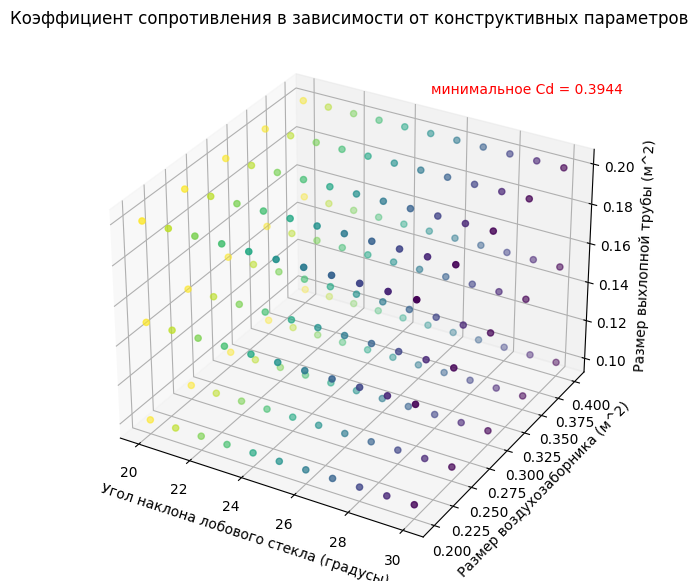

In [154]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = np.meshgrid(windshield_range, air_intake_range, exhaust_range, indexing='ij')
ax.scatter(X, Y, Z, c=drag_coefficients.flatten(), cmap='viridis')
ax.set_xlabel('Угол наклона лобового стекла (градусы)')
ax.set_ylabel('Размер воздухозаборника (м^2)')
ax.set_zlabel('Размер выхлопной трубы (м^2)')
ax.set_title('Коэффициент сопротивления в зависимости от конструктивных параметров')
ax.text(25, air_intake_min, 0.22, f'минимальное Cd = {Cd_min:.4f}', color='red')
plt.show()